## Customer Segmentation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
# read the local csv
data = pd.read_csv('Data/Mall_Customers.csv', encoding='unicode_escape')

In [6]:
# check the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# check the data description
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# check the data shape
data.shape

(200, 5)

In [11]:
# see all object columns
data.select_dtypes(include=['object']).columns

Index(['Gender'], dtype='object')

In [12]:
# see all numeric columns
data.select_dtypes(include=['int64', 'float64']).columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [13]:
# check the missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
# check the duplicated values
data.duplicated().sum()

0

In [15]:
# drop the duplicated values
data.drop_duplicates(inplace=True)

In [16]:
# 'Gemder' column into binary values
# Mapping dictionary
gender_mapping = {'Male': 0, 'Female': 1}

# Convert 'Gender' column to numeric
data['Gender'] = data['Gender'].map(gender_mapping)

# Optional: If you want to convert the column data type to int
data['Gender'] = data['Gender'].astype(int)

In [17]:
# check the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

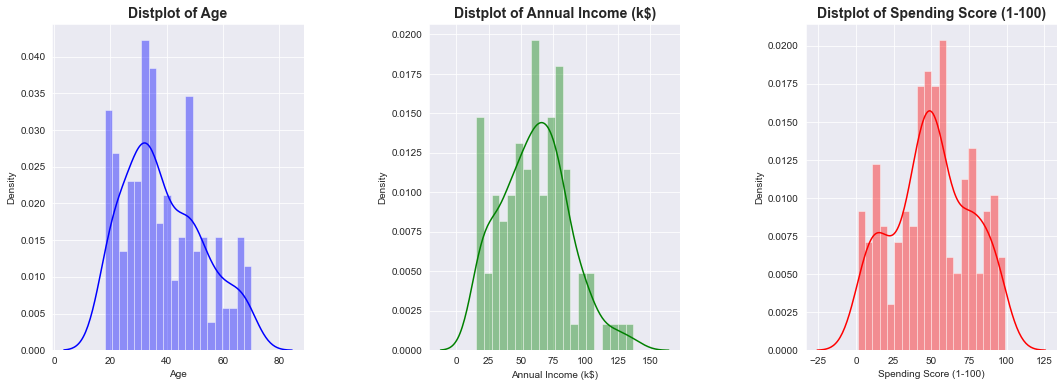

In [27]:
# plot a graph to see the distribution of the data
plt.figure(figsize=(18, 6))
n = 0
colors = ['blue', 'green', 'red']

for x, color in zip(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], colors):
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20, color=color)
    plt.title('Distplot of {}'.format(x), fontsize=14, fontweight='bold')  # Adjust fontsize and fontweight as needed

plt.show()

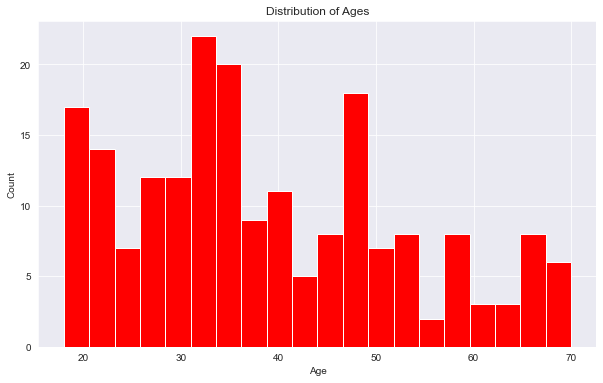

In [21]:
# plot a graph to see the exdending score of different ages
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='red')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')

# Display the histogram
plt.show()

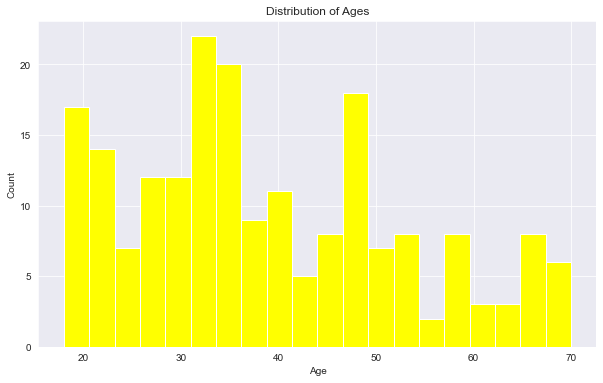

In [29]:
# plot a graph to see the exdending score of different ages add labels
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='yellow')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')

# Display the histogram
plt.show()

In [30]:
'''
Split the data into two parts:
X = CustomerID Gender Age Annual Income (k$)
Y = Spending Score (1-100)
'''

'\nSplit the data into two parts:\nX = CustomerID Gender Age Annual Income (k$)\nY = Spending Score (1-100)\n'

In [31]:
# split the data
X = data.iloc[:, 1:4]
Y = data.iloc[:, 4]

In [32]:
# check the data
X.head()

,Gender,Age,Annual Income (k$)
0,0,19,15
1,0,21,15
2,1,20,16
3,1,23,16
4,1,31,17


In [33]:
# check the data
Y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [34]:
# create a train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)

In [35]:
# check the shape of the train and test split
X_train.shape, X_test.shape # ((160, 3), (40, 3))

((160, 3), (40, 3))

In [36]:
# check the shape of the train and test split
Y_train.shape, Y_test.shape # ((160,), (40,))

((160,), (40,))

In [37]:
# create a KMeans model
kmeans = KMeans(n_clusters=5, random_state=0)

In [38]:
# fit the model
kmeans.fit(X_train)

KMeans(n_clusters=5, random_state=0)

In [39]:
# predict the model
Y_pred = kmeans.predict(X_test)

In [40]:
# check the predicted values
Y_pred

array([2, 0, 4, 4, 0, 3, 2, 0, 4, 0, 1, 0, 3, 0, 4, 2, 2, 0, 2, 4, 3, 0,
       2, 0, 4, 0, 0, 3, 0, 4, 2, 4, 0, 1, 2, 3, 0, 2, 4, 4])

In [44]:
# check the actual values
Y_test

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
61     55
125    77
180    32
154    16
80     51
7      94
33     92
130     9
37     73
74     47
183    88
145    97
45     65
159    73
60     56
123    91
179    90
185    97
122    58
44     28
16     35
55     41
150    17
111    54
22      5
189    85
129    75
4      40
83     44
106    50
Name: Spending Score (1-100), dtype: int64

In [45]:
# train the model
kmeans.fit(X_train, Y_train)

KMeans(n_clusters=5, random_state=0)

In [46]:
# predict the model
Y_pred = kmeans.predict(X_test)

In [47]:
# check the predicted values
Y_pred

array([2, 0, 4, 4, 0, 3, 2, 0, 4, 0, 1, 0, 3, 0, 4, 2, 2, 0, 2, 4, 3, 0,
       2, 0, 4, 0, 0, 3, 0, 4, 2, 4, 0, 1, 2, 3, 0, 2, 4, 4])

In [48]:
# check the model accuracy with train data
kmeans.score(X_train, Y_train)

-25168.193442799282

In [49]:
# check the model accuracy with test data
kmeans.score(X_test, Y_test)

-6890.467216573008

In [50]:
# check the model accuracy with test data
kmeans.score(X_test, Y_pred)

-6890.467216573008

In [51]:
# check the model accuracy with test data
kmeans.score(X_test, Y_pred)

-6890.467216573008

In [52]:
# improve the model accuracy
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

In [53]:
# fit the model
kmeans.fit(X_train)

I:\Anaconda\envs\learn\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


KMeans(n_clusters=5, n_jobs=-1, random_state=0)

In [54]:
# predict the model
Y_pred = kmeans.predict(X_test)

In [55]:
# check the predicted values
Y_pred

array([2, 0, 4, 4, 0, 3, 2, 0, 4, 0, 1, 0, 3, 0, 4, 2, 2, 0, 2, 4, 3, 0,
       2, 0, 4, 0, 0, 3, 0, 4, 2, 4, 0, 1, 2, 3, 0, 2, 4, 4])

In [56]:
# check the model accuracy with train data
kmeans.score(X_train, Y_train)

-25168.193442799282

In [57]:
# check the model accuracy with test data
kmeans.score(X_test, Y_test)

-6890.467216573008

In [60]:
# check the model accuracy with test data
kmeans.score(X_test, Y_pred)

-6890.467216573008

In [61]:
# use diffrent model to train the data
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1, algorithm='full')

In [62]:
# fit the model
kmeans.fit(X_train)

I:\Anaconda\envs\learn\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
I:\Anaconda\envs\learn\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


KMeans(algorithm='full', n_clusters=5, n_jobs=-1, random_state=0)

In [63]:
# predict the model
Y_pred = kmeans.predict(X_test)

In [64]:
# check the predicted values
Y_pred

array([2, 0, 4, 4, 0, 3, 2, 0, 4, 0, 1, 0, 3, 0, 4, 2, 2, 0, 2, 4, 3, 0,
       2, 0, 4, 0, 0, 3, 0, 4, 2, 4, 0, 1, 2, 3, 0, 2, 4, 4])

In [65]:
# check the model accuracy with train data
kmeans.score(X_train, Y_train)

-25168.193442799282

In [66]:
# check the model accuracy with test data
kmeans.score(X_test, Y_test)

-6890.467216573008